<a href="https://colab.research.google.com/github/SerArtDev/redes-neuronales/blob/main/aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no supervisado
Es en el cual el modelo aprende de los datos sin que estos tengan etiquetas. Sin estas etiquetas, el modelo debe ser capaz de encontrar patrones y diferenciar tipos de datos. Este tipo de aprendizaje puede ser catalogado en tres tipos:
 - **Clustering**: Agrupación de puntos con valores similares. Ejemplos de estos son k-means clustering y hierarchical clustering.
 - **Association**: Encontrar relaciones entre variables en conjuntos grandes de datos. Una aplicación es en análisis en qué productos relacionados compran los clientes en un pago. Ejemplos de algoritmo son el a priori algorithm y Eclat algorithm
 - **Dimensionality reduction**: Consiste en la eliminación de variables para dejar solamente a las principales. Ejemplos de estos son Principal Componen Analysis (PCA) y t-distributed stochastic neighbor embedding (t-SNE).


## Autoencoders
Son redes neuronales con el propósito de reducir la dimensión o aprendizaje de características. Los enconders comprimen los datos a una representación "latente" para luego poder ser reconstruidos y son entrenados para reducir la diferencia entre esta entrada y salida reconstruida.

In [1]:
# Implementación de autoencoder en Keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
# Definición del econder
# Se crea una capa de entrada con 784 características
input_layer = Input(shape=(784,))
# Se comprimen esas características a 64
encoded = Dense(64, activation='relu')(input_layer)
# Se decodifican de nuevo a 784 características
decoded = Dense(784, activation='sigmoid')(encoded)
# Se crea el modelo
autoencoder = Model(input_layer, decoded)
# Se compila el modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          50,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:
# Para entrenar este modelo se pueden usar los mismos datos para la entrada como
# para la salida. Vamos a usar el conjunto de datos MNIST
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()
# Normalización de los datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Entrenamiendo del autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test)
                )


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.3444 - val_loss: 0.1609
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1516 - val_loss: 0.1257
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1222 - val_loss: 0.1081
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1061 - val_loss: 0.0972
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0965 - val_loss: 0.0899
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0894 - val_loss: 0.0848
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0846 - val_loss: 0.0814
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0816 - val_loss: 0.0789
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0791 - val_loss: 0.0772
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0775 - val_loss: 0.0761
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0766 - val_los

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


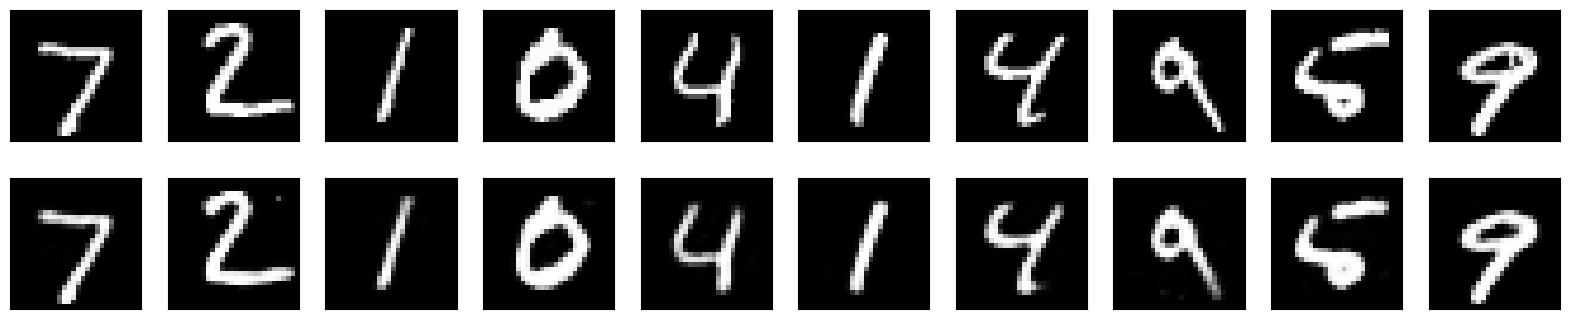

In [6]:
import matplotlib.pyplot as plt

# Predict the test data
reconstructed = autoencoder.predict(x_test)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [7]:
# Se puede hacer fine tuning para mejores resultados
for layer in autoencoder.layers[-4:]:
    layer.trainable = True

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0728 - val_loss: 0.0723
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0727 - val_loss: 0.0723
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0725 - val_loss: 0.0722
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0726 - val_loss: 0.0722
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0726 - val_loss: 0.0723
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0726 - val_loss: 0.0722
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0728 - val_loss: 0.0722
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0725 - val_loss: 0.0722
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0726 - val_loss: 0.0722
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0725 - val_loss: 0.0722


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2081 - val_loss: 0.1417
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1390 - val_loss: 0.1310
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1298 - val_loss: 0.1254
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1248 - val_loss: 0.1218
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1217 - val_loss: 0.1193
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1190 - val_loss: 0.1178
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1174 - val_loss: 0.1165
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1161 - val_loss: 0.1155
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1152 - val_loss: 0.1148
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1146 - val_loss: 0.1145
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1140 - val_loss: 0.1137
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 

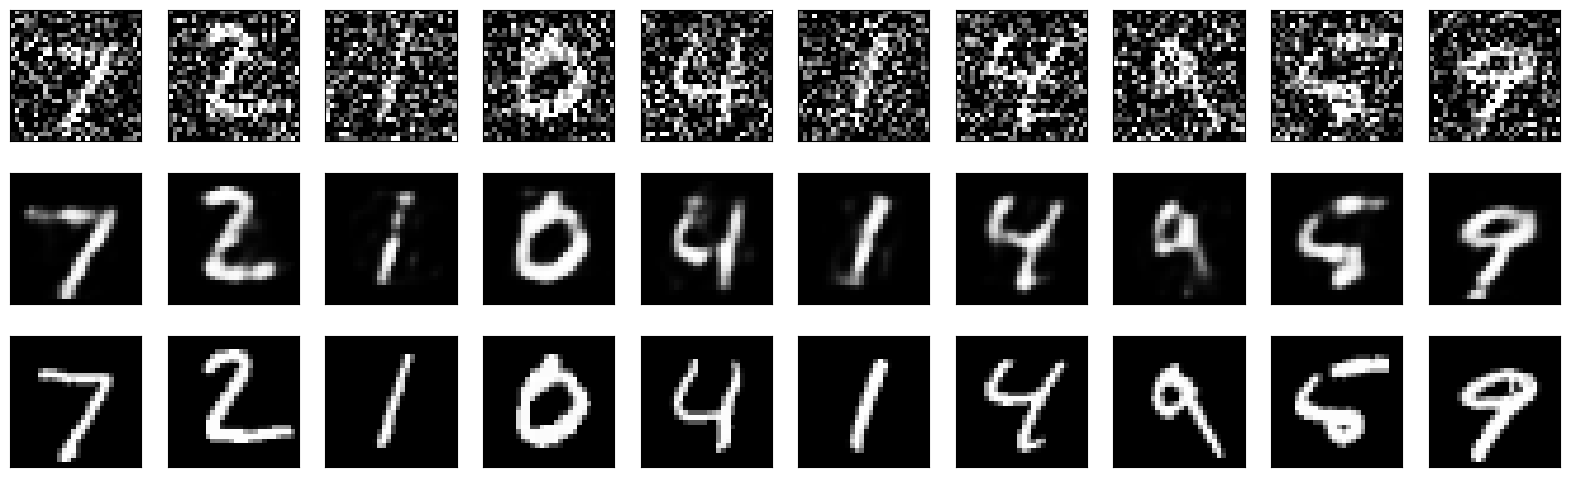

In [8]:
# Se puede usar para quitar ruido a imágenes

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Generative Adversarial Networks (GANs)

Son una clase de redes neuronales diseñadas en 2014 por Ian Goodfellow. Consisten en dos redes: la generadora y la discriminadora, las cuales compiten entre sí en un juego de suma cero. La generadora crear datos a partir de su entrenamiento, mientras que la discriminadora verifica la autenticidad de estos datos. Mientras una trata de engañar a la otra con datos generados (no auténticos) a partir de ruida, la otra clasifica los datos entre reales y falsos. El entrenamiento termina cuando el discriminador no puede distinguir datos falsos. Esta arquitectura tiene diversas aplicaciones:
- Generación de imágenes realistas
- Generación de imágenes a partir de texto
- Generación de imágenes a partir de otras imágenes
- Aumento de datos para generar datos sintéticos

In [3]:
# Implementación de GANs
import numpy as np
from tensorflow.keras.layers import LeakyReLU
# Definimos el generador
def build_generator():
    model = tf.keras.Sequential()
    model.add(Dense(128, input_dim=100))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(784, activation='tanh'))
    return model

# Definimos el discriminador
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(Dense(128, input_dim=784,))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [4]:
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
generator = build_generator()

# Ensamblar la GANs con el generador y discriminador
discriminator.trainable = False
gan_input = Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [5]:
# El entrenamiento consiste en entrenar al generador y al discriminador
# alternándolos
def train_gan(gan, generator, discriminator, x_train, epochs=400, batch_size=128):
    for epoch in range(epochs):
      # Generación de ruido para la entrada del generador
      noise = np.random.normal(0, 1, size=(batch_size, 100))
      # Generación de datos falsos
      generated_images = generator.predict(noise)

      # Conjunto de imágenes reales
      real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]

      # Etiquetas para las imágenes reales y falsas
      real_labels = np.ones((batch_size, 1))
      fake_labels = np.zeros((batch_size, 1))
      # Entrenamiento del discriminador
      d_loss_real = discriminator.train_on_batch(real_images, real_labels)
      d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

      # Entrenamiento del generador
      noise = np.random.normal(0, 1, size=(batch_size, 100))
      g_loss = gan.train_on_batch(noise, real_labels)

      # Imprimir progreso
      if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

    return d_loss, g_loss


## Modelos de difusión
Estos toman los datos con ruido y lo quitan mediante distintas transformaciones y un proceso parecido a la difusión física, donde las partículas van de regiones de alta concentración a regiones de baja concentración. Son utilizados para generación de datos sintéticos de alta calidad, generación de imágenes y reducción de ruido.

In [9]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Load the data set
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Expand dimensions to match the input shape (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be within the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [10]:
input_layer = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)  # Reduced filters
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)  # Reduced filters
x = Flatten()(x)
x = Dense(64, activation='relu')(x)  # Reduced size
x = Dense(28*28*32, activation='relu')(x)  # Reduced size
x = Reshape((28, 28, 32))(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)  # Reduced filters
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)  # Reduced filters
output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
diffusion_model = Model(input_layer, output_layer)

# Compile the model with mixed precision and a different loss function
diffusion_model.compile(optimizer='adam', loss='mean_squared_error')  # Using MSE for regression tasks

# Summary of the optimized model
diffusion_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 25088)               │       1,630,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,255,233 (12.42 MB)

 Trainable params: 3,255,233 (12.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Cache and prefetch the data using TensorFlow data pipelines for faster loading
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_noisy, x_train))
train_dataset = train_dataset.cache().batch(64).prefetch(tf.data.AUTOTUNE)  # Reduced batch size

val_dataset = tf.data.Dataset.from_tensor_slices((x_test_noisy, x_test))
val_dataset = val_dataset.cache().batch(64).prefetch(tf.data.AUTOTUNE)  # Reduced batch size

In [12]:
# Implement early stopping based on validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model with early stopping and smaller batch size
diffusion_model.fit(
    train_dataset,
    epochs=3,
    shuffle=True,
    validation_data=val_dataset,
    callbacks=[early_stopping]
)

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 345s 365ms/step - loss: 0.0558 - val_loss: 0.0169
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 381s 363ms/step - loss: 0.0140 - val_loss: 0.0132
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 331s 353ms/step - loss: 0.0116 - val_loss: 0.0129


313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step


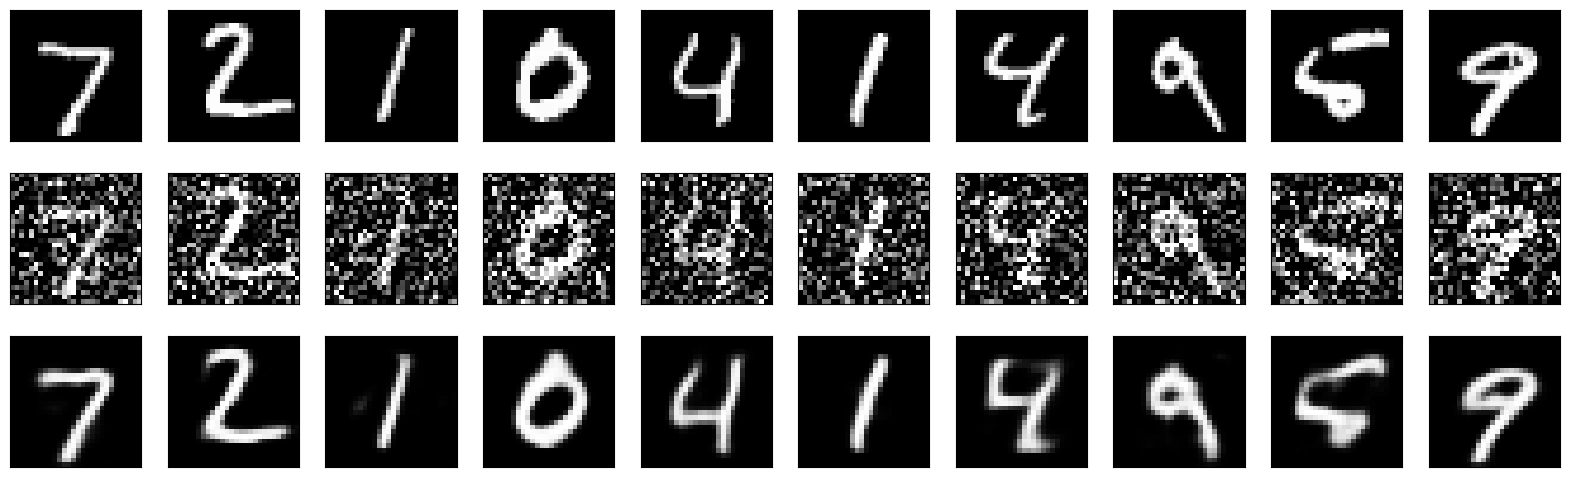

In [13]:
import matplotlib.pyplot as plt

# Predict the denoised images
denoised_images = diffusion_model.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()